In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.naive_bayes import GaussianNB,MultinomialNB

## 1.Problem Statement
- Create a model to classify the Quality of an apple based on their features

## 2. Data Collection

In [2]:
# collect the dataset from kaggle,which is used to create a good model for classification
data = pd.read_csv("apple.csv")    
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
data.iloc[3]

A_id                     3
Size             -0.657196
Weight            -2.27163
Sweetness          1.32487
Crunchiness     -0.0978747
Juiciness          3.63797
Ripeness          -3.41376
Acidity        0.790723217
Quality               good
Name: 3, dtype: object

## 3. EDA and 4.Pre-processing

In [4]:
data.shape   # data set contains 4001 rows and 9 columns

(4001, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
A_id           4000 non-null float64
Size           4000 non-null float64
Weight         4000 non-null float64
Sweetness      4000 non-null float64
Crunchiness    4000 non-null float64
Juiciness      4000 non-null float64
Ripeness       4000 non-null float64
Acidity        4001 non-null object
Quality        4000 non-null object
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


- This data contains some numerical data and categorical data.
- Column ACIDITY  is a numerical column so we can convert obejct to numerical type.
- This data contains one missing row.So we can simply remove those row


In [6]:
data.drop(4000,axis = 0,inplace = True)   # remove missing row,which contain last row in the data set.

In [7]:
data["Acidity"] = data["Acidity"].astype("float")   # we can convert Acidity type from object to numerical

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
A_id           4000 non-null float64
Size           4000 non-null float64
Weight         4000 non-null float64
Sweetness      4000 non-null float64
Crunchiness    4000 non-null float64
Juiciness      4000 non-null float64
Ripeness       4000 non-null float64
Acidity        4000 non-null float64
Quality        4000 non-null object
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [9]:
data.duplicated().sum()    # there is no duplicated values are here.

0

In [10]:
data.Quality.value_counts()  # balanced data

good    2004
bad     1996
Name: Quality, dtype: int64

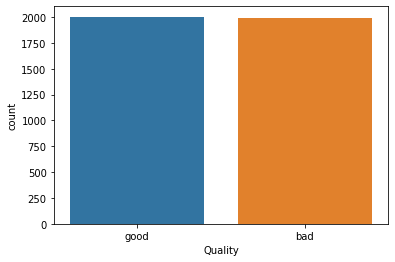

In [11]:
sns.countplot(data.Quality)
plt.show()

In [12]:
# we don't have any use of A_id column ,so simply remove those column
fv = data.iloc[:,1:-1]
cv = data.iloc[:,-1]
fv

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [13]:
# convert good as 0 and bad as 1
cv = cv.map({"good":0,"bad":1})

In [14]:
cv

0       0
1       0
2       1
3       0
4       0
       ..
3995    1
3996    0
3997    1
3998    0
3999    0
Name: Quality, Length: 4000, dtype: int64

## 5.EDA after Pre-processing

In [15]:
# Our features are contains numerical data type.
cor_mat = fv.corr()
cor_mat

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


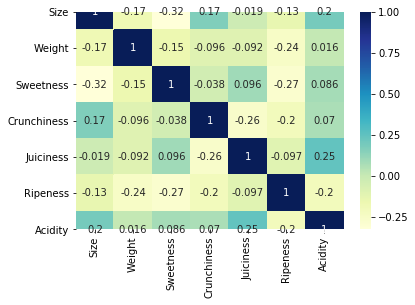

In [16]:
sns.heatmap(cor_mat,annot=True ,cmap='YlGnBu')
plt.show()

Based on above graph and table, all the features are indipendent only.So we will go with Naive Bayes theroem
- our dataset is a numerical data set so we will go with Gaussian distribution.
- then check each feature follows gaussian distribution or not

##### By using Q-Q plot,I find that those columns are follows Gaussian distribution or Not


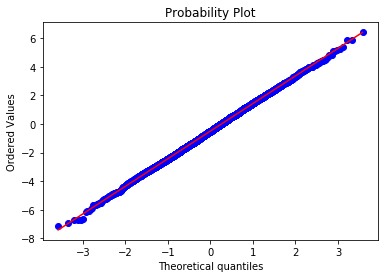

In [17]:
import scipy.stats as ss
ss.probplot(fv["Size"],dist = "norm",fit = True,plot = plt)   # x_train["size"] = observed data , norm = theoritical data
plt.show()

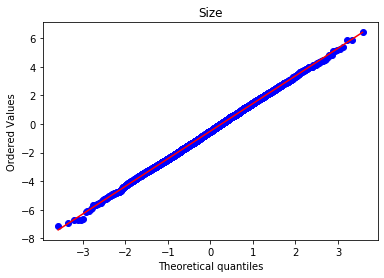

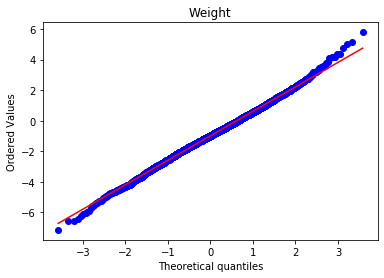

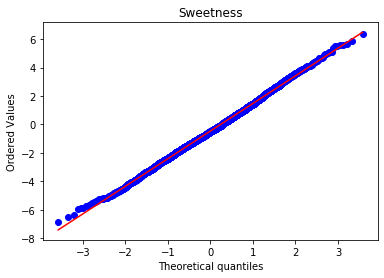

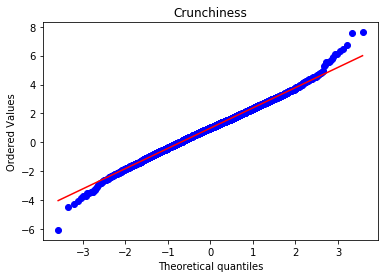

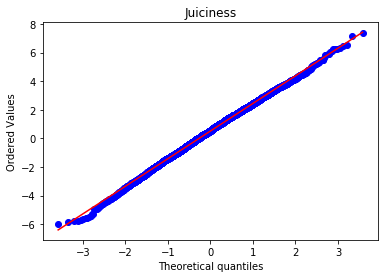

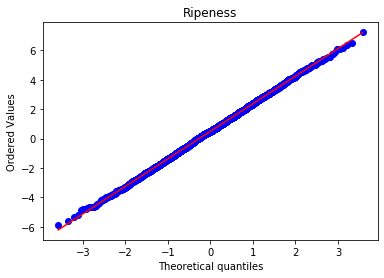

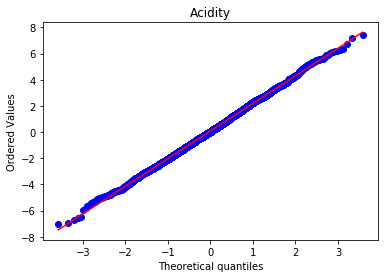

In [18]:
for y in fv.columns:      
    ss.probplot(fv[y],dist = "norm",fit = True,plot = plt)    
    plt.title(y)
    plt.show()
    

Based on above graphs, all the features follows Gaussian distribution,So we performe Gaussian Naive bayes

## 6.Feature Engineering

In [19]:
# split feature variables and class variables as x_train amd x_test
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 56 to 3484
Data columns (total 7 columns):
Size           3200 non-null float64
Weight         3200 non-null float64
Sweetness      3200 non-null float64
Crunchiness    3200 non-null float64
Juiciness      3200 non-null float64
Ripeness       3200 non-null float64
Acidity        3200 non-null float64
dtypes: float64(7)
memory usage: 200.0 KB


In [21]:
# split x_train into category wise
#my data contains numerical only,so split my data as numerical_data

numerical_data = x_train.select_dtypes(include = ["int64","float64"])

In [22]:
num_pip = Pipeline([("imputer",SimpleImputer()) ,("Standardization",StandardScaler())])

In [23]:
numerical_data.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [24]:
ctp = ColumnTransformer([("numerical",num_pip,numerical_data.columns)],remainder = "passthrough")

In [25]:
pd.DataFrame(ctp.fit_transform(x_train),columns=x_train.columns)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,1.214168,0.283869,0.048753,-0.528640,-0.677039,0.861514,-1.597987
1,-2.344181,-1.816712,0.538941,-0.619930,1.127213,1.197396,2.649759
2,1.323675,0.324580,-2.209065,-0.167630,0.818971,1.355283,-0.399645
3,0.107170,-1.228358,0.058610,0.102957,0.270633,-0.938269,1.162644
4,0.903637,-0.011459,-0.446214,1.458389,-1.570015,-1.243917,-0.401871
...,...,...,...,...,...,...,...
3195,1.770326,-1.996984,-1.335395,-0.385899,2.091093,0.050873,0.352606
3196,0.452830,-0.393251,0.534435,0.524684,0.341773,-1.401094,1.585150
3197,0.218241,-0.450986,0.931320,-0.520476,0.778019,0.280449,-1.620184
3198,0.967573,-0.632267,-1.101400,1.051642,0.931003,-0.681130,0.420932


In [26]:
final_pre=Pipeline([("Pre-Processing",ctp)])

In [27]:
import pickle
pickle.dump(final_pre,open(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Machine Learning\pickles\apple quality\final_pre.pkl","wb"))

## 7.Training

In [28]:
# x_train follows gaussian distribution so i can use GaussianNB

In [29]:
# create an object of GaussianNB class
g = GaussianNB()

# fit x_train and y_train based on gaussian NB 
model = g.fit(final_pre.fit_transform(x_train),y_train)

In [30]:
import pickle
pickle.dump(model,open(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Machine Learning\pickles\apple quality\model.pkl","wb"))

then finally we create a model for the Gaussian Naive bayes

## 8. Model Evalution

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test,model.predict(final_pre.transform(x_test)))

array([[304,  97],
       [106, 293]], dtype=int64)

In [33]:
print(classification_report(y_test,model.predict(final_pre.transform(x_test))))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       401
           1       0.75      0.73      0.74       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



It will give the accuracy rate of 76%

## 9.Testing

In [34]:
m = final_pre.transform(x_test.iloc[[2]])
pred = model.predict(m)   # it is used to shows that predicted value 

if pred == 0:
    print("good")
else:
    print("bad")

good


i will give a query point from x_test as input to the model,then it will returns class label(good / bad)

## 10. Conclusion

In conclusion, the testing results demonstrate the effectiveness and reliability of the predictive model in assessing the quality of apples. With its accurate predictions and robust performance, the model holds promise for enhancing quality control processes in apple production and ensuring consumer satisfaction.




